# Budget Analysis

---

## Environment Setup

In [11]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [12]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [13]:
# Set environment variables from the .env file
load_dotenv()

True

In [14]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [15]:
# Create the client object
client = plaid.Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    public_key=PLAID_PUBLIC_KEY,
    environment="sandbox"
)

In [16]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [18]:
# Create the public token

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(
    INSITUTION_ID,
    ["transactions","income","assets"]
)

# Print the public token
print (f"Public token : {create_tkn_response}")

Public token : {'public_token': 'public-sandbox-467cb107-6ce7-46b8-a73f-6a45b3c6c9fa', 'request_id': 'kXTZo7TtyuDJ9su'}


### 3. Exchange the public token for an access token

In [19]:
# Retrieve the access token

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response["public_token"])

# Print the access toke
print (f"Access token : {exchange_response}")

Access token : {'access_token': 'access-sandbox-8b01087b-c43e-4058-a177-d40d5949f504', 'item_id': 'bKvVprNqLXUo8LJamdLPubNyDyo8eZtVqqvzW', 'request_id': 'BIGPYAkfIqzUfOn'}


In [20]:
# Store the access token in a Python variable
access_token = exchange_response["access_token"]

### 4. Fetch Accounts

In [21]:
# Retrieve accounts
accounts = client.Accounts.get(access_token)

# Print accounts
pretty_print_response (accounts)

{
    "accounts": [
        {
            "account_id": "n7aV4egjyDu1JM7xNLMkiqK4eeNBK6S6WAv8A",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "bKvVprNqLXUo8LJamdLPubNyeeADN5cVZm8Go",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [22]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions
pretty_print_response (transaction_response)

ount_owner": null,
            "amount": 5850,
            "authorized_date": null,
            "category": [
                "Transfer",
                "Debit"
            ],
            "category_id": "21006000",
            "date": "2020-04-14",
            "iso_currency_code": "USD",
            "location": {
                "address": null,
                "city": null,
                "country": null,
                "lat": null,
                "lon": null,
                "postal_code": null,
                "region": null,
                "store_number": null
            },
            "merchant_name": null,
            "name": "ACH Electronic CreditGUSTO PAY 123456",
            "payment_channel": "other",
            "payment_meta": {
                "by_order_of": null,
                "payee": null,
                "payer": null,
                "payment_method": "ACH",
                "payment_processor": null,
                "ppd_id": null,
                "reason": nu

### 2. Print the categories for each transaction

In [23]:
# Create a for-loop to print the categories for each transaction

category_list = []

for element in transaction_response["transactions"]:
    category_list.append( (element["category"][0]))

# Print the category list
pretty_print_response (category_list)


[
    "Food and Drink",
    "Transfer",
    "Travel",
    "Travel",
    "Food and Drink",
    "Payment",
    "Food and Drink",
    "Shops",
    "Payment",
    "Travel",
    "Transfer",
    "Transfer",
    "Recreation",
    "Travel",
    "Food and Drink",
    "Food and Drink",
    "Food and Drink",
    "Transfer",
    "Travel",
    "Travel",
    "Food and Drink",
    "Payment",
    "Food and Drink",
    "Shops",
    "Payment",
    "Travel",
    "Transfer",
    "Transfer",
    "Recreation",
    "Travel",
    "Food and Drink",
    "Food and Drink",
    "Food and Drink",
    "Transfer",
    "Travel",
    "Travel",
    "Food and Drink",
    "Payment",
    "Food and Drink",
    "Shops",
    "Payment",
    "Travel",
    "Transfer",
    "Transfer",
    "Recreation",
    "Travel",
    "Food and Drink",
    "Food and Drink",
    "Food and Drink"
]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [24]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
# Retrieve all the transactions
# Populate the transactions DataFrame with the transactions data

budget_analysis_df = pd.DataFrame(transaction_response["transactions"])
budget_analysis_df = budget_analysis_df[["date","name","amount"]]
budget_analysis_df["category"] = category_list

# Display sample data from the DataFrame  
budget_analysis_df.head()


,date,name,amount,category
0,2020-07-10,SparkFun,89.40,Food and Drink
1,2020-07-09,INTRST PYMNT,-4.22,Transfer
2,2020-06-29,United Airlines,500.00,Travel
3,2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
4,2020-06-24,Tectra Inc,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [25]:
# Display data types
budget_analysis_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [26]:
# Make any required data type transformation
budget_analysis_df["date"] = pd.to_datetime(budget_analysis_df["date"])

# Print the budget analysis dataframe
budget_analysis_df.head()


,date,name,amount,category
0,2020-07-10,SparkFun,89.40,Food and Drink
1,2020-07-09,INTRST PYMNT,-4.22,Transfer
2,2020-06-29,United Airlines,500.00,Travel
3,2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
4,2020-06-24,Tectra Inc,500.00,Food and Drink


In [27]:
# Set the date column as index
budget_analysis_df = budget_analysis_df.set_index("date")

# Display sample data
budget_analysis_df.head()

,name,amount,category
date,,,
2020-07-10,SparkFun,89.40,Food and Drink
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-06-29,United Airlines,500.00,Travel
2020-06-27,Uber 072515 SF**POOL**,6.33,Travel
2020-06-24,Tectra Inc,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [28]:
# Fetch the income data
income_response = client.Income.get(access_token)

# Print the income data
pretty_print_response (income_response)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "7vU2QFS17kmmE8Z"
}


In [29]:
# Determine the previous year's gross income and print the results
previous_year_gross_income = income_response["income"]["last_year_income_before_tax"]
print(f"Last year gross income = {previous_year_gross_income}")


Last year gross income = 7285


In [30]:
# Determine the current monthly income and print the results
current_monthly_income = income_response["income"]["income_streams"][0]["monthly_income"]
print(f"Current monthly income = {current_monthly_income}")

Current monthly income = 500


In [31]:
# Determine the projected yearly income and print the results
projected_yearly_income = income_response["income"]["projected_yearly_income"]
print(f"Projected yearly income = {projected_yearly_income}")

Projected yearly income = 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [32]:
# Compute the total expenses per category
expense_by_category = budget_analysis_df.groupby("category")["amount"].sum()

# Display the expenses per catefory
expense_by_category

category
Food and Drink     3406.59
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

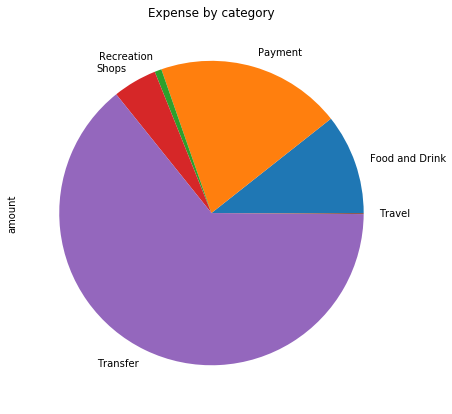

In [33]:
# Create a spending categories pie chart.
expense_by_category.plot.pie(y='amount',figsize=(7,7),title="Expense by category")

### Calculate the expenses per month

In [34]:
# Create a DataFrame with the total expenses
#spending_per_month = budget_analysis_df.resample('M').sum()
spending_per_month = budget_analysis_df.groupby(budget_analysis_df.index.month).sum()

# Display sample data
spending_per_month.head()


,amount
date,
4,10649.46
5,10645.24
6,10645.24
7,85.18


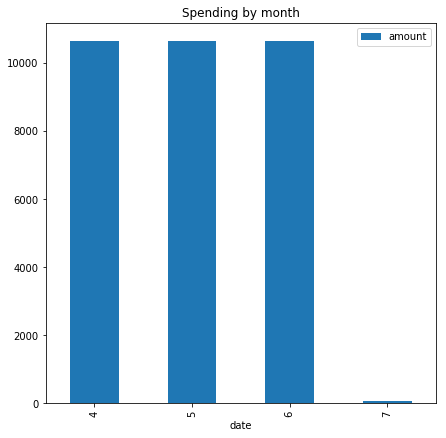

In [35]:
# Create a spending per month bar chart
spending_per_month.plot.bar(y='amount',figsize=(7,7),title="Spending by month")